# Setting

In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 200 # 해상도 설정
plt.rcParams['font.family'] = 'NanumSquare' # plt 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결

# ABCD 마트 Data Load

In [2]:
# Data Load
gds_a = pd.read_csv('data/gds_a.csv')
gds_b = pd.read_csv('data/gds_b.csv')
gds_c = pd.read_csv('data/gds_c.csv')
gds_d = pd.read_csv('data/gds_d.csv')

tr_dtl_list_a = pd.read_csv('data/tr_dtl_list_a.csv')
tr_dtl_list_b = pd.read_csv('data/tr_dtl_list_b.csv')
tr_dtl_list_c = pd.read_csv('data/tr_dtl_list_c.csv')
tr_dtl_list_d = pd.read_csv('data/tr_dtl_list_d.csv')

tr_list_a = pd.read_csv('data/tr_list_a.csv')
tr_list_b = pd.read_csv('data/tr_list_b.csv')
tr_list_c = pd.read_csv('data/tr_list_c.csv')
tr_list_d = pd.read_csv('data/tr_list_d.csv')

# 전처리

## 거래내역 없는 상품 메타데이터 삭제

In [3]:
tr_dtl_list_a[tr_dtl_list_a['PLU_CD'] == 22000088]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SEQ_NO,DESI_CNCL_TP_NM,SALE_RTN_SGN,PLU_CD,GDS_CLSS_CD,SALE_QTY,SALE_PRC,SALE_AMT,SGDS_DC_TP_NM,SGDS_DC_PRC,SUBTOT_DC_AMT,EVT_DC_AMT,CPON_DC_AMT,SCALES_GDS_TP_NM,GDS_CPON_DC_AMT,BASKET_CPON_DC_AMT


- 확인 과정에서 GDS_NM(제품 명)으로 존재하는 물품인데 해당 물품의 PLU_CD(제품 코드)로 조회해보면 tr_dtl_list(세부 매출 목록)에는 하나도 존재하지 않는 내역이 있음 → 전처리 시도

In [4]:
gds_a.shape[0]

72147

In [5]:
uni_list = gds_a.PLU_CD.unique()
len(uni_list)

71982

In [6]:
none_list = []
for i in uni_list:
    if tr_dtl_list_a[tr_dtl_list_a['PLU_CD'] == i].shape[0] == 0: # 상세 매출 데이터에 해당 제품코드가 없을 경우
        none_list.append(i)

In [7]:
len(none_list)

56519

In [8]:
for mart_name in ['a','b','c','d']:
    # 변수명 지정
    gds_name = 'gds_' + mart_name
    tr_dtl_name = 'tr_dtl_list_' + mart_name

    # Data Load
    gds_mart = pd.read_csv('data/' + gds_name + '.csv')
    tr_dtl_mart = pd.read_csv('data/' + tr_dtl_name + '.csv')

    # 중복 삭제
    uni_list = gds_mart.PLU_CD.unique()
    for i in uni_list:
        if tr_dtl_mart[tr_dtl_mart['PLU_CD'] == i].shape[0] == 0: # 상세 매출 데이터에 해당 제품코드가 없을 경우
            gds_mart = gds_mart.drop(gds_mart[gds_mart['PLU_CD'] == i].index)
            gds_mart.to_csv('data/' + gds_name + '_prep.csv')

    # 전처리 전후 차이 비교
    gds_mart_origin = pd.read_csv('data/' + gds_name + '.csv')
    gds_mart_prep = pd.read_csv('data/'+ gds_name + '_prep.csv')
    mart_upper = mart_name.upper()
    print(f'{mart_upper}마트의 row수는 {gds_mart_origin.shape[0]}에서 {gds_mart_prep.shape[0]}로 {gds_mart_origin.shape[0] - gds_mart_prep.shape[0]}만큼 감소되었습니다.')

A마트의 row수는 72147에서 15536로 56611만큼 감소되었습니다.
B마트의 row수는 30526에서 9339로 21187만큼 감소되었습니다.
C마트의 row수는 48674에서 3672로 45002만큼 감소되었습니다.
D마트의 row수는 21388에서 6778로 14610만큼 감소되었습니다.


In [9]:
gds_a_prep = pd.read_csv('data/gds_a_prep.csv', index_col=0)
gds_b_prep = pd.read_csv('data/gds_b_prep.csv', index_col=0)
gds_c_prep = pd.read_csv('data/gds_c_prep.csv', index_col=0)
gds_d_prep = pd.read_csv('data/gds_d_prep.csv', index_col=0)

### 일반/저울상품/배송료 분류 (전처리 전후)

In [10]:
gds_a['GDS_TP_NM'].value_counts()

일반      69671
저울상품     2474
배송료         2
Name: GDS_TP_NM, dtype: int64

In [11]:
gds_a_prep['GDS_TP_NM'].value_counts()

일반      15011
저울상품      525
Name: GDS_TP_NM, dtype: int64

In [12]:
gds_b['GDS_TP_NM'].value_counts()

일반      28110
저울상품     2409
공병          5
배송료         2
Name: GDS_TP_NM, dtype: int64

In [13]:
gds_b_prep['GDS_TP_NM'].value_counts()

일반      8686
저울상품     652
배송료        1
Name: GDS_TP_NM, dtype: int64

In [14]:
gds_c['GDS_TP_NM'].value_counts()

일반      47768
저울상품      904
배송료         2
Name: GDS_TP_NM, dtype: int64

In [15]:
gds_c_prep['GDS_TP_NM'].value_counts()

일반      3582
저울상품      90
Name: GDS_TP_NM, dtype: int64

In [16]:
gds_d['GDS_TP_NM'].value_counts()

일반     21386
배송료        2
Name: GDS_TP_NM, dtype: int64

In [17]:
gds_d_prep['GDS_TP_NM'].value_counts()

일반     6777
배송료       1
Name: GDS_TP_NM, dtype: int64

## Join

- https://mizykk.tistory.com/82
- how = 'outer'로 join함

In [18]:
for mart_name in ['a','b','c','d']:
    # 변수명 설정
    gds_prep_name = 'gds_' + mart_name + '_prep'
    tr_dtl_name = 'tr_dtl_list_' + mart_name

    # Data Load
    gds_prep_mart = pd.read_csv('data/' + gds_prep_name + '.csv')
    tr_dtl_mart = pd.read_csv('data/' + tr_dtl_name + '.csv')

    # Join
    merge_mart = pd.merge(gds_prep_mart[['PLU_CD', 'GDS_NM']], tr_dtl_mart[['PLU_CD', 'SAL_DT', 'SALE_QTY', 'SALE_PRC', 'SALE_AMT']], how='outer', on='PLU_CD')

    # Save data
    merge_mart.to_csv('data/' + 'merge_' + mart_name + '.csv')

In [19]:
merge_a = pd.read_csv('data/merge_a.csv', index_col=0)
merge_b = pd.read_csv('data/merge_b.csv', index_col=0)
merge_c = pd.read_csv('data/merge_c.csv', index_col=0)
merge_d = pd.read_csv('data/merge_d.csv', index_col=0)

# EDA

## 콩나물

In [ ]:
# A마트
gds_a_prep[gds_a_prep.GDS_NM.str.contains('콩나물')]

In [20]:
cnm_a = merge_a[(merge_a['PLU_CD'] == 201307) | (merge_a['PLU_CD'] == 201308)]

cnm_a['SAL_DT'] = cnm_a['SAL_DT'].astype(str) # int to str
cnm_a['SAL_DT'] = cnm_a['SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d')) # https://junyoru.tistory.com/134

# 일자별
a = cnm_a.groupby('SAL_DT').size()

In [21]:
cnm_a['SAL_DT'].describe() # DateTime Series describe 메서드 사용
# 판매가 안 된 날: 2일 존재(unique: 363)

count                    3556
unique                    363
top       2022-02-28 00:00:00
freq                       24
first     2021-09-01 00:00:00
last      2022-09-01 00:00:00
Name: SAL_DT, dtype: object

In [22]:
cnm_a['SAL_DT_Year'] = cnm_a['SAL_DT'].dt.year # Year
cnm_a['SAL_DT_Month'] = cnm_a['SAL_DT'].dt.month # Month
cnm_a['SAL_DT_Day'] = cnm_a['SAL_DT'].dt.day # Day
cnm_a['SAL_DT_Week'] = cnm_a['SAL_DT'].dt.week # Week
cnm_a['SAL_DT_Week_4'] = (cnm_a['SAL_DT_Week'] % 4) + 1 # Week % 4
cnm_a['SAL_DT_Week_5'] = (cnm_a['SAL_DT_Week'] % 5) + 1 # Week % 5
cnm_a['SAL_DT_Day_of_the_Week'] = cnm_a['SAL_DT'].dt.day_name() # Day of the Week

In [ ]:
# C마트
gds_c_prep[gds_c_prep.GDS_NM.str.contains('콩나물')]

In [23]:
cnm_c = merge_c[merge_c['PLU_CD'] == 205249]

cnm_c['SAL_DT'] = cnm_c['SAL_DT'].astype(str) # int to str
cnm_c['SAL_DT'] = cnm_c['SAL_DT'].apply(lambda x: datetime.strptime(x,'%Y%m%d')) # https://junyoru.tistory.com/134

# 일자별
c = cnm_c.groupby('SAL_DT').size()

In [24]:
cnm_c['SAL_DT'].describe() # DateTime Series describe 메서드 사용
# 판매가 안 된 날 91일 존재(unique: 274)

count                     599
unique                    274
top       2022-01-30 00:00:00
freq                        8
first     2021-09-06 00:00:00
last      2022-08-31 00:00:00
Name: SAL_DT, dtype: object

In [25]:
cnm_c['SAL_DT_Year'] = cnm_c['SAL_DT'].dt.year # Year
cnm_c['SAL_DT_Month'] = cnm_c['SAL_DT'].dt.month # Month
cnm_c['SAL_DT_Day'] = cnm_c['SAL_DT'].dt.day # Day
cnm_c['SAL_DT_Week'] = cnm_c['SAL_DT'].dt.week # Week
cnm_c['SAL_DT_Week_4'] = (cnm_c['SAL_DT_Week'] % 4) + 1 # Week % 4
cnm_c['SAL_DT_Week_5'] = (cnm_c['SAL_DT_Week'] % 5 ) + 1 # Week % 5
cnm_c['SAL_DT_Day_of_the_Week'] = cnm_c['SAL_DT'].dt.day_name() # Day of the Week

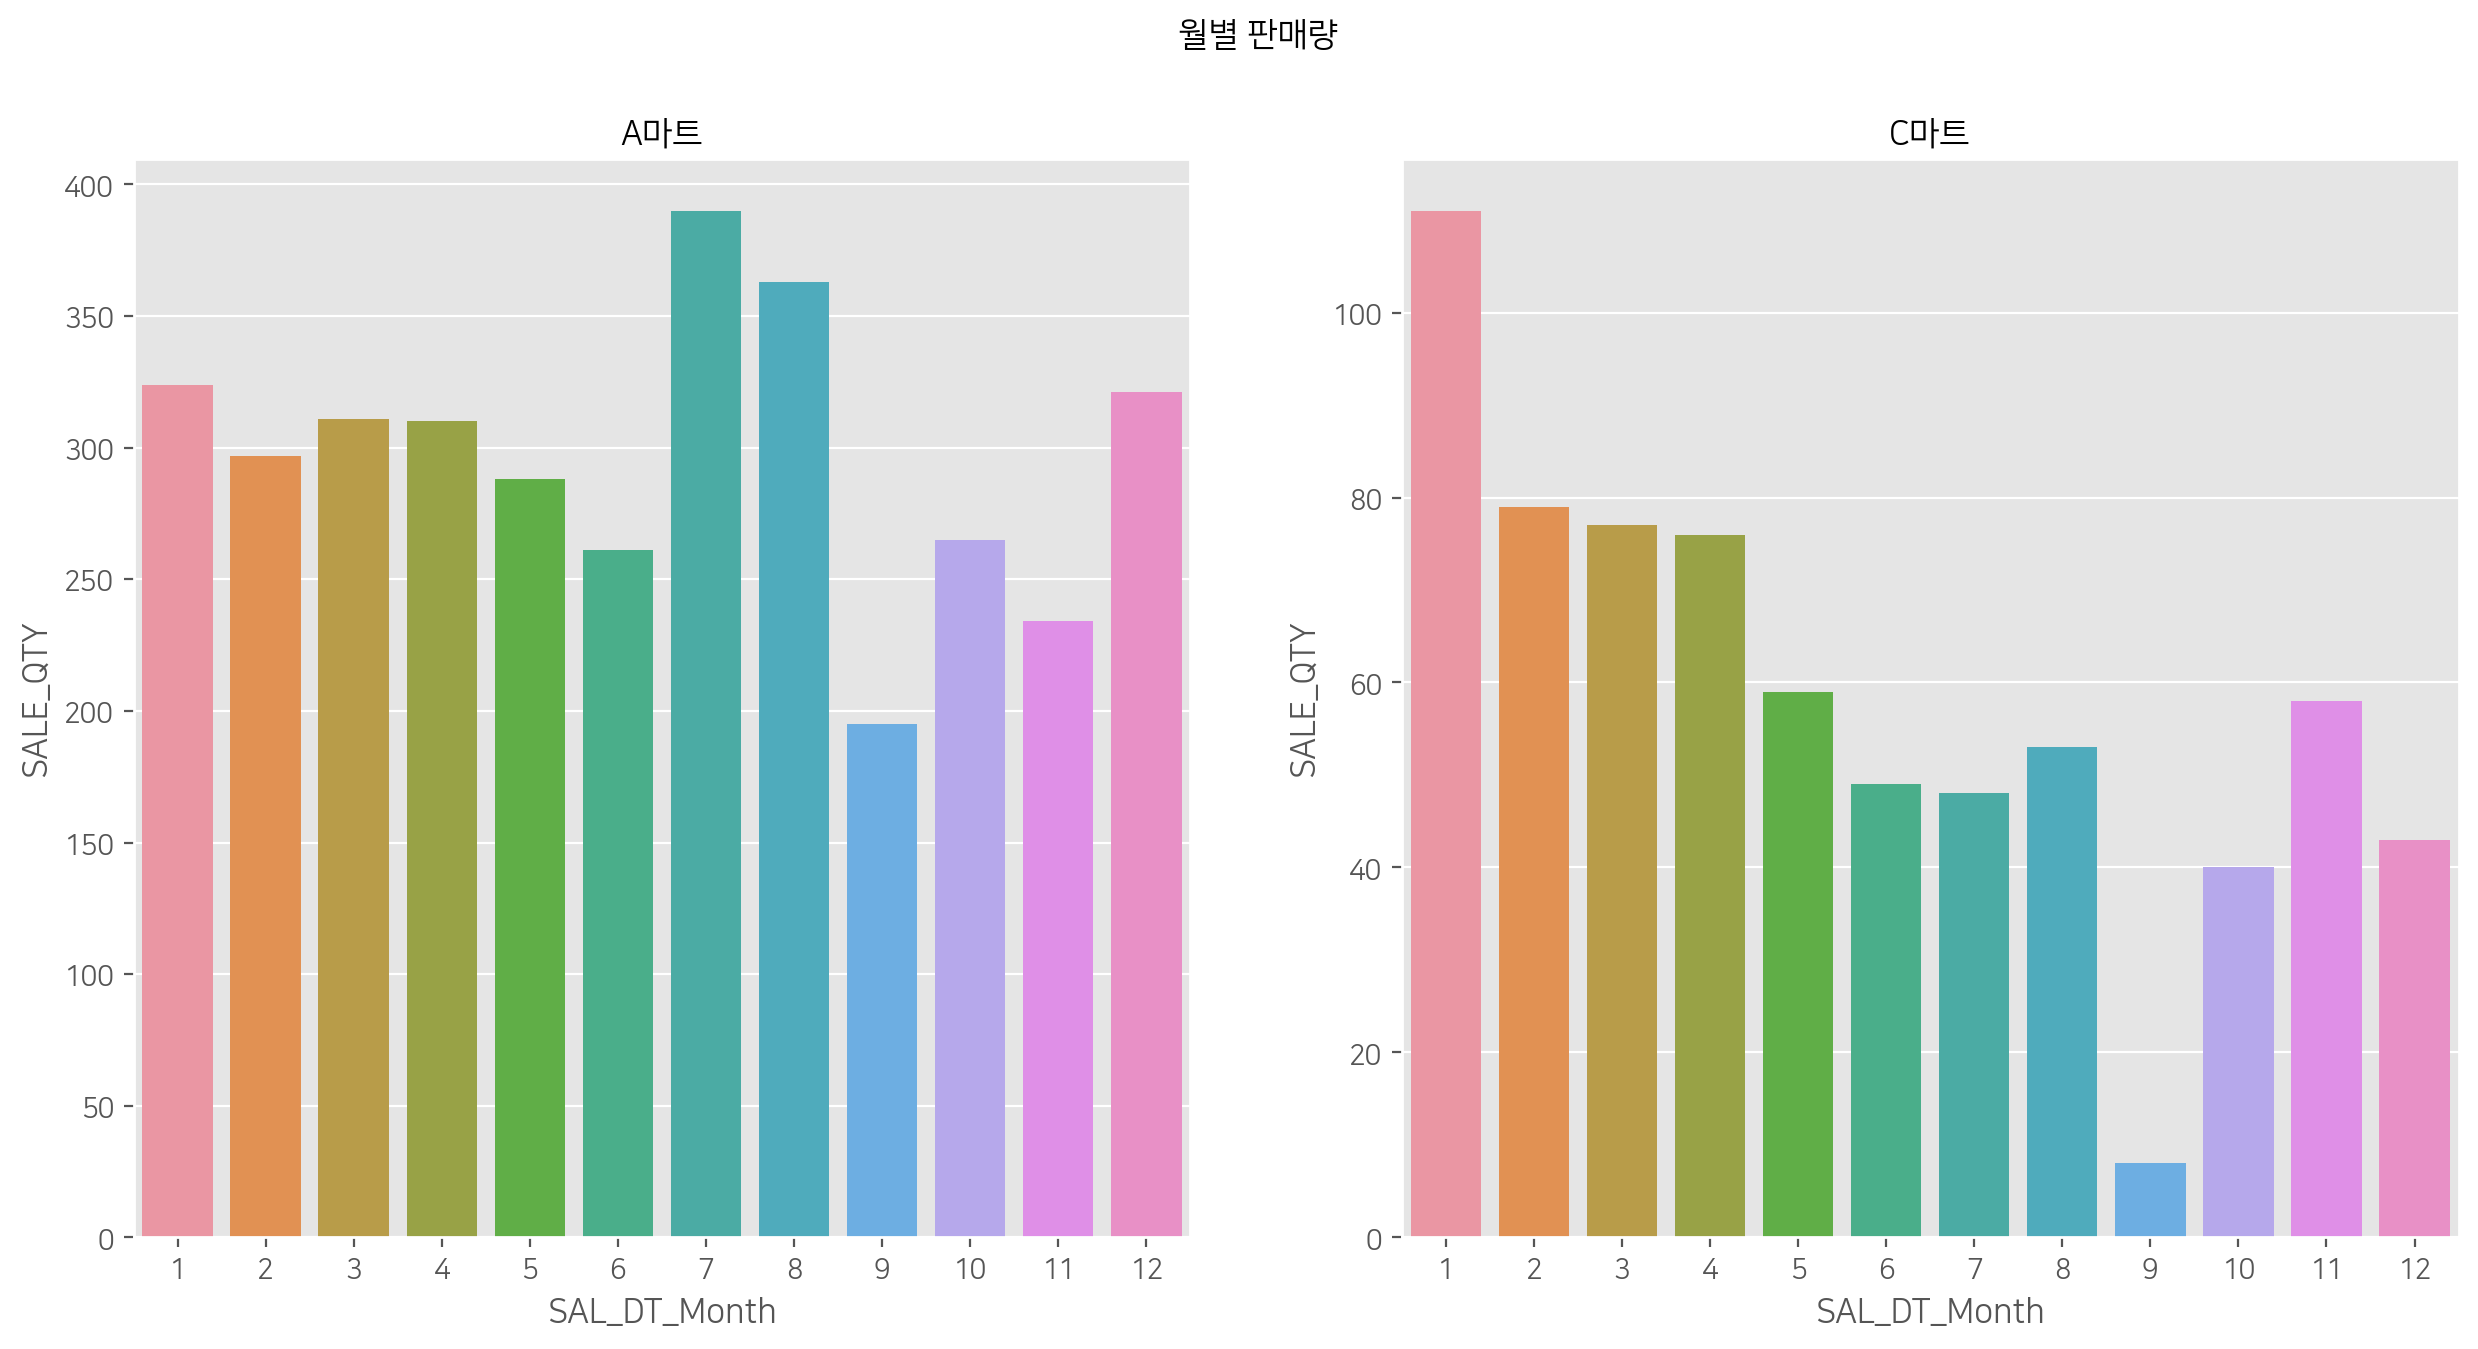

In [26]:
# Pivot Table
cnm_group_month_a = pd.pivot_table(data=cnm_a, index='SAL_DT_Month', values='SALE_QTY', aggfunc='sum')
cnm_group_month_c = pd.pivot_table(data=cnm_c, index='SAL_DT_Month', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('월별 판매량', fontweight='bold', size = 12)

plt.subplot(121)
plt.title('A마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_month_a.index, y=cnm_group_month_a['SALE_QTY'])

plt.subplot(122)
plt.title('C마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_month_c.index, y=cnm_group_month_c['SALE_QTY'])

plt.show()

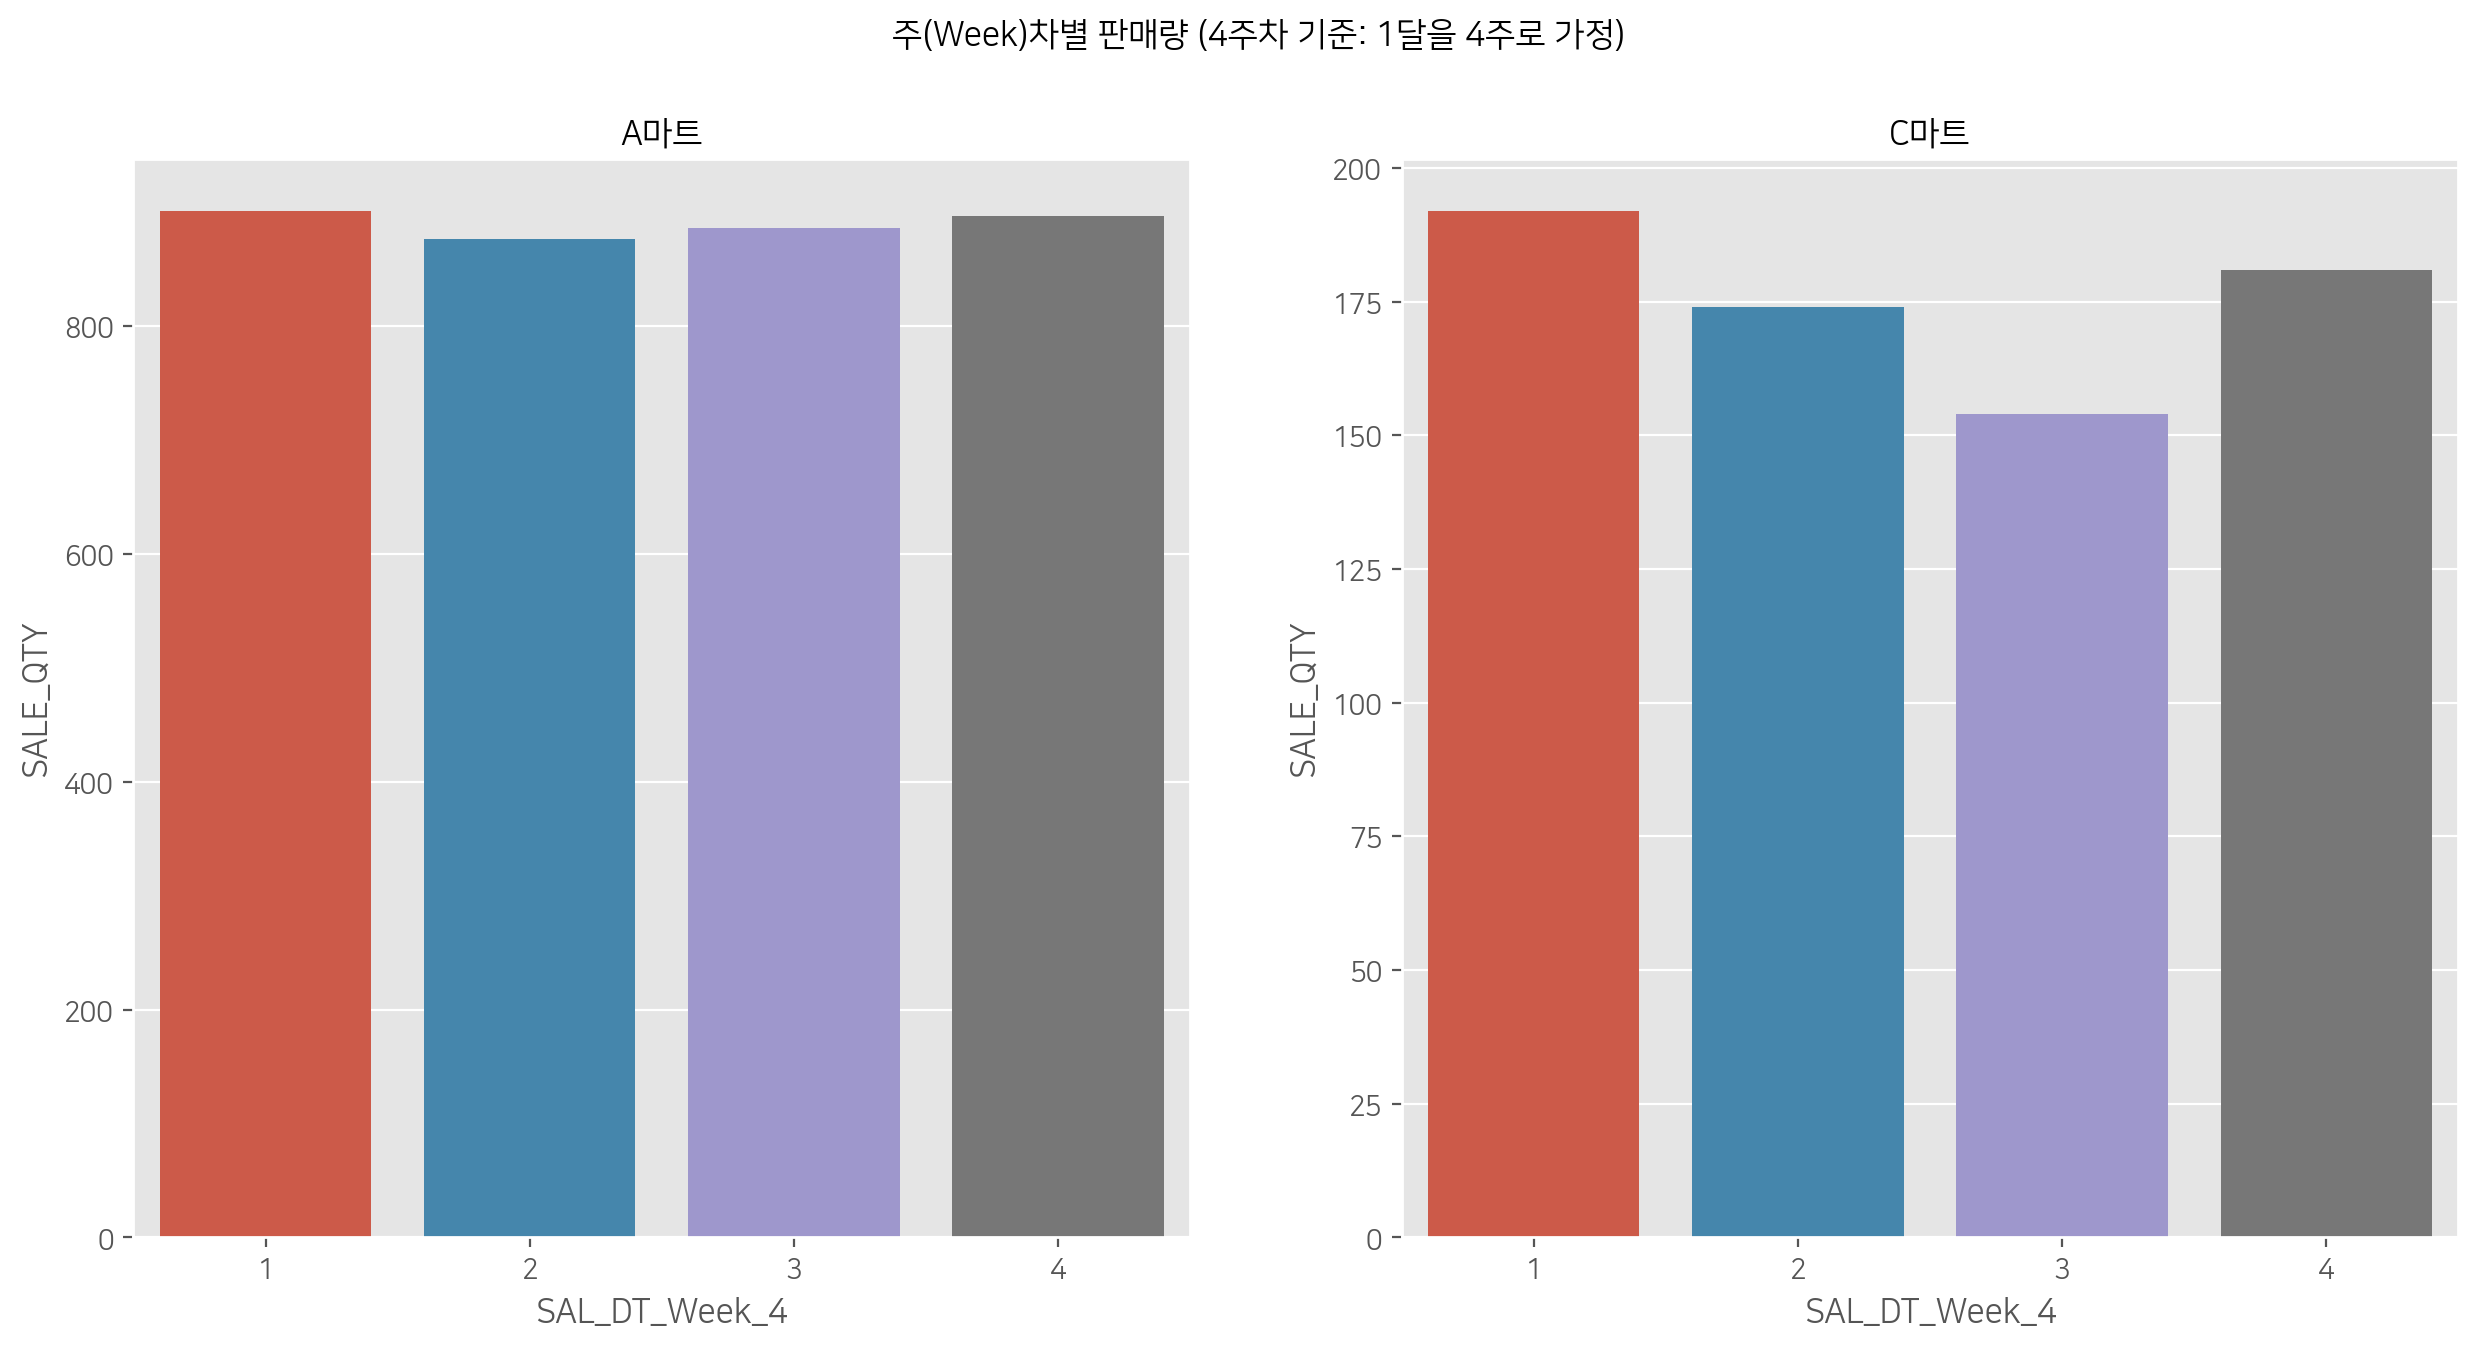

In [27]:
# Pivot Table
cnm_group_w4_a = pd.pivot_table(data=cnm_a, index='SAL_DT_Week_4', values='SALE_QTY', aggfunc='sum')
cnm_group_w4_c = pd.pivot_table(data=cnm_c, index='SAL_DT_Week_4', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('주(Week)차별 판매량 (4주차 기준: 1달을 4주로 가정)', fontweight='bold', size = 12)

plt.subplot(121)
plt.title('A마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_w4_a.index, y=cnm_group_w4_a['SALE_QTY'])

plt.subplot(122)
plt.title('C마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_w4_c.index, y=cnm_group_w4_c['SALE_QTY'])

plt.show()

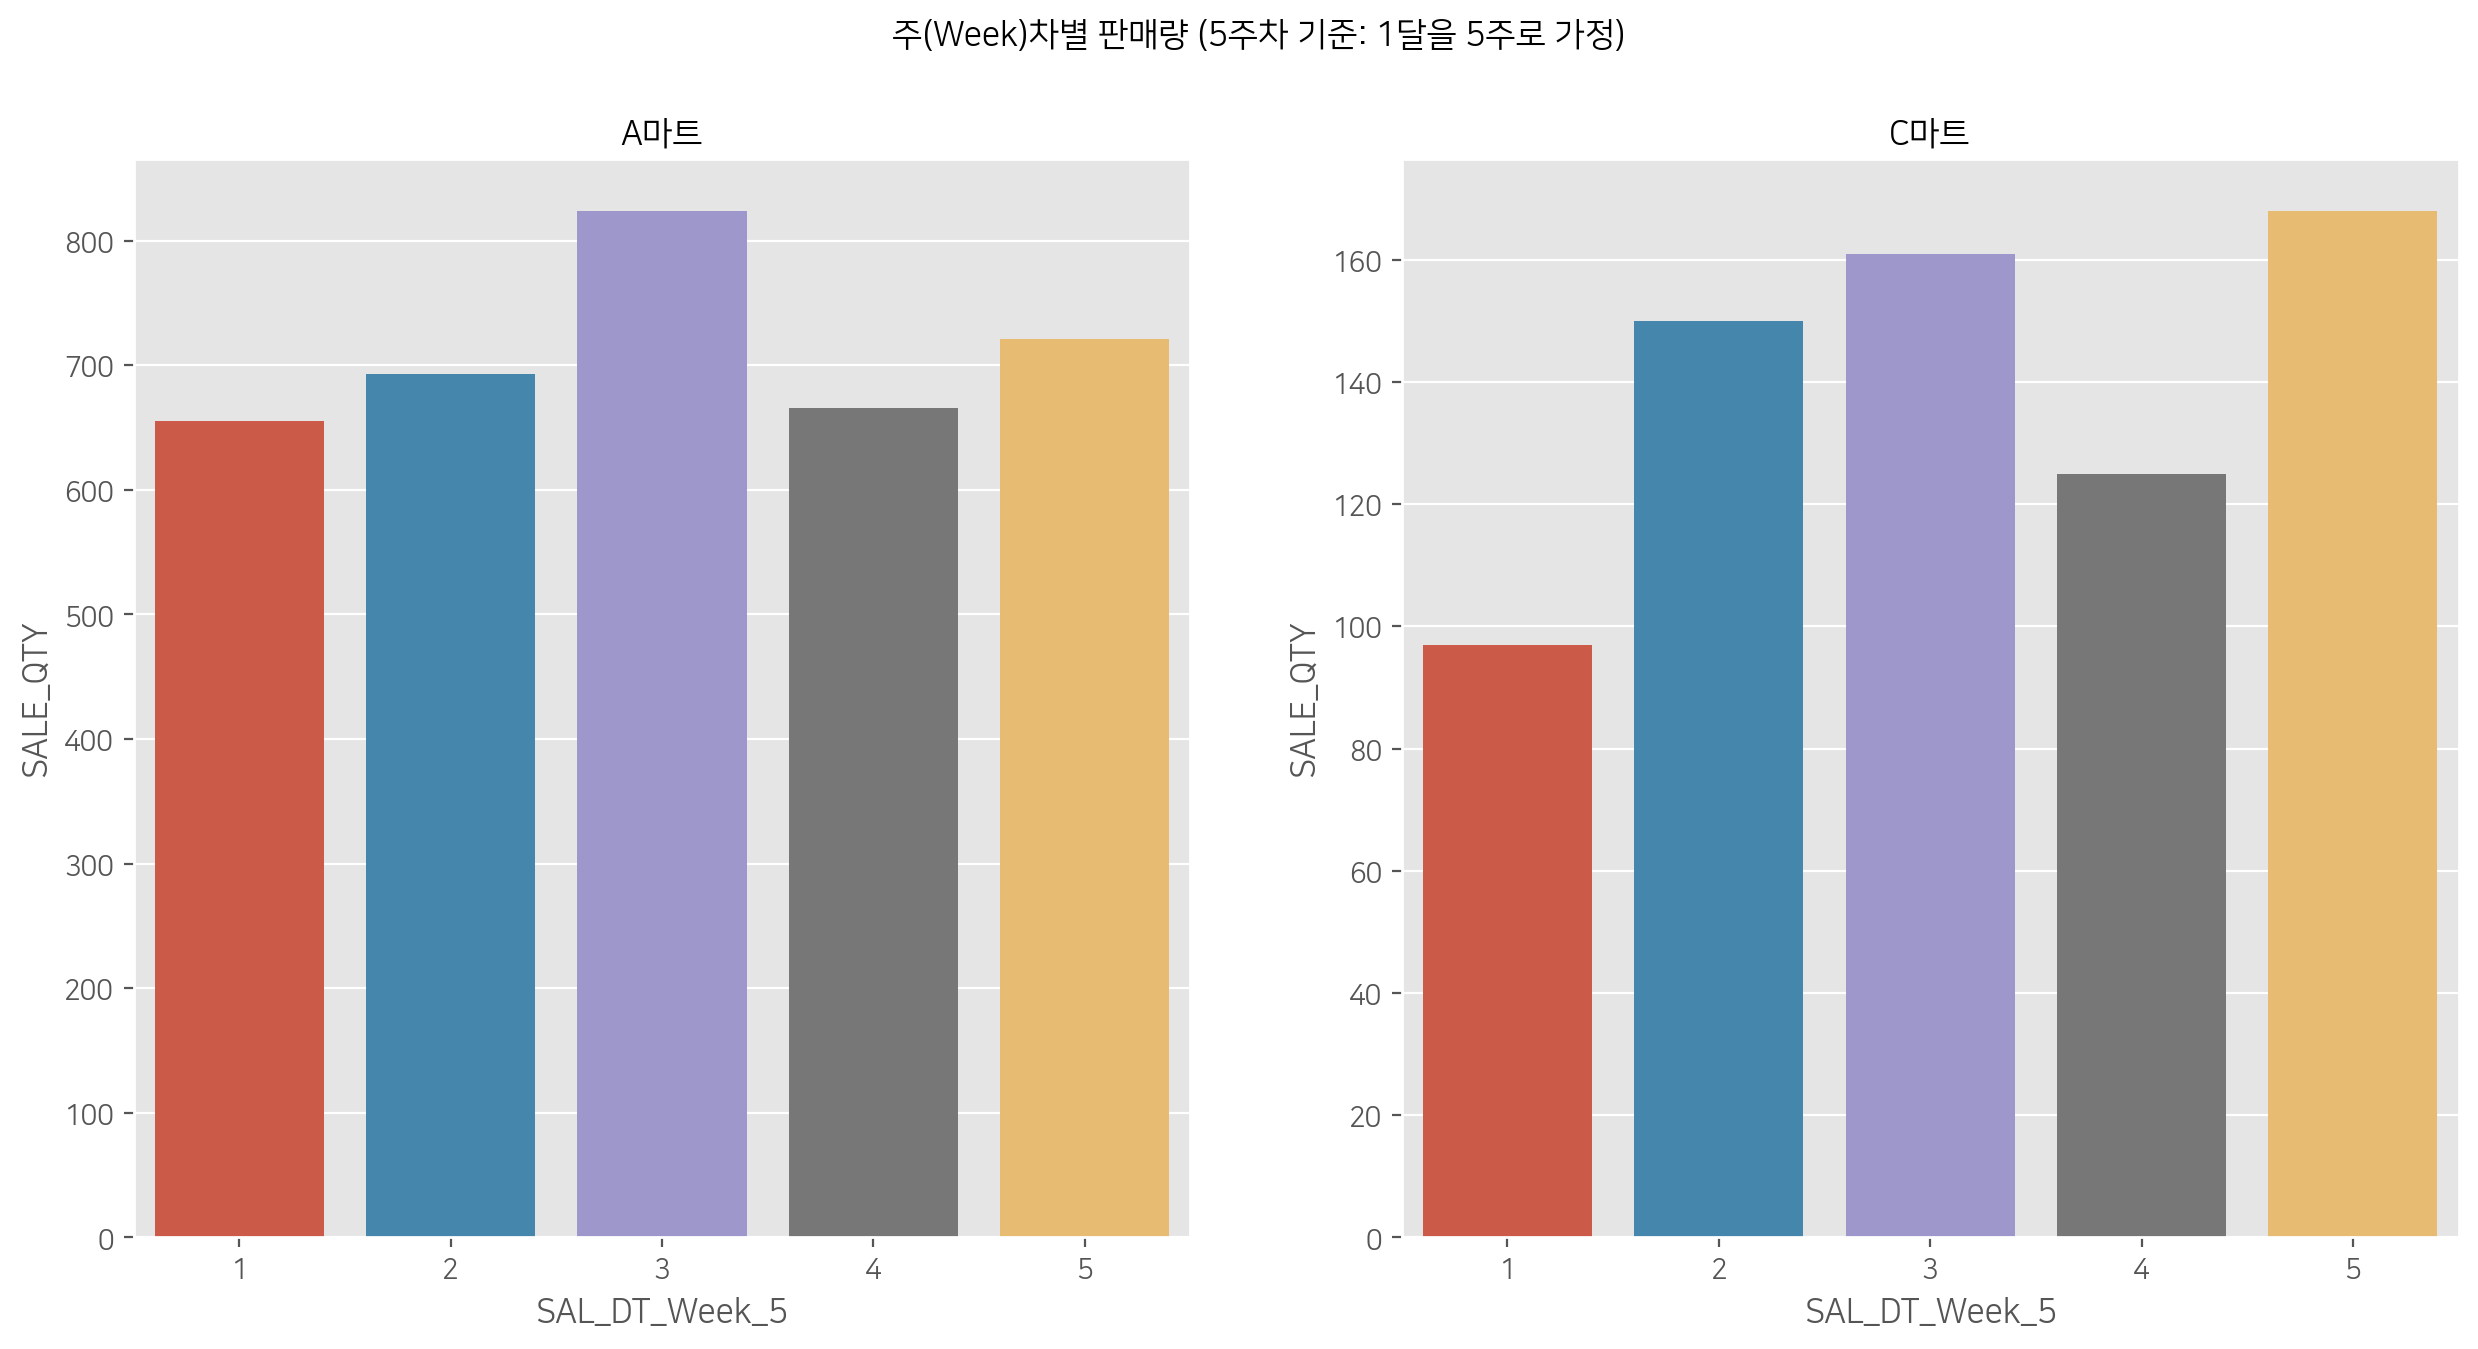

In [28]:
# Pivot Table
cnm_group_w5_a = pd.pivot_table(data=cnm_a, index='SAL_DT_Week_5', values='SALE_QTY', aggfunc='sum')
cnm_group_w5_c = pd.pivot_table(data=cnm_c, index='SAL_DT_Week_5', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('주(Week)차별 판매량 (5주차 기준: 1달을 5주로 가정)', fontweight='bold', size = 12)

plt.subplot(121)
plt.title('A마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_w5_a.index, y=cnm_group_w5_a['SALE_QTY'])

plt.subplot(122)
plt.title('C마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_w5_c.index, y=cnm_group_w5_c['SALE_QTY'])

plt.show()

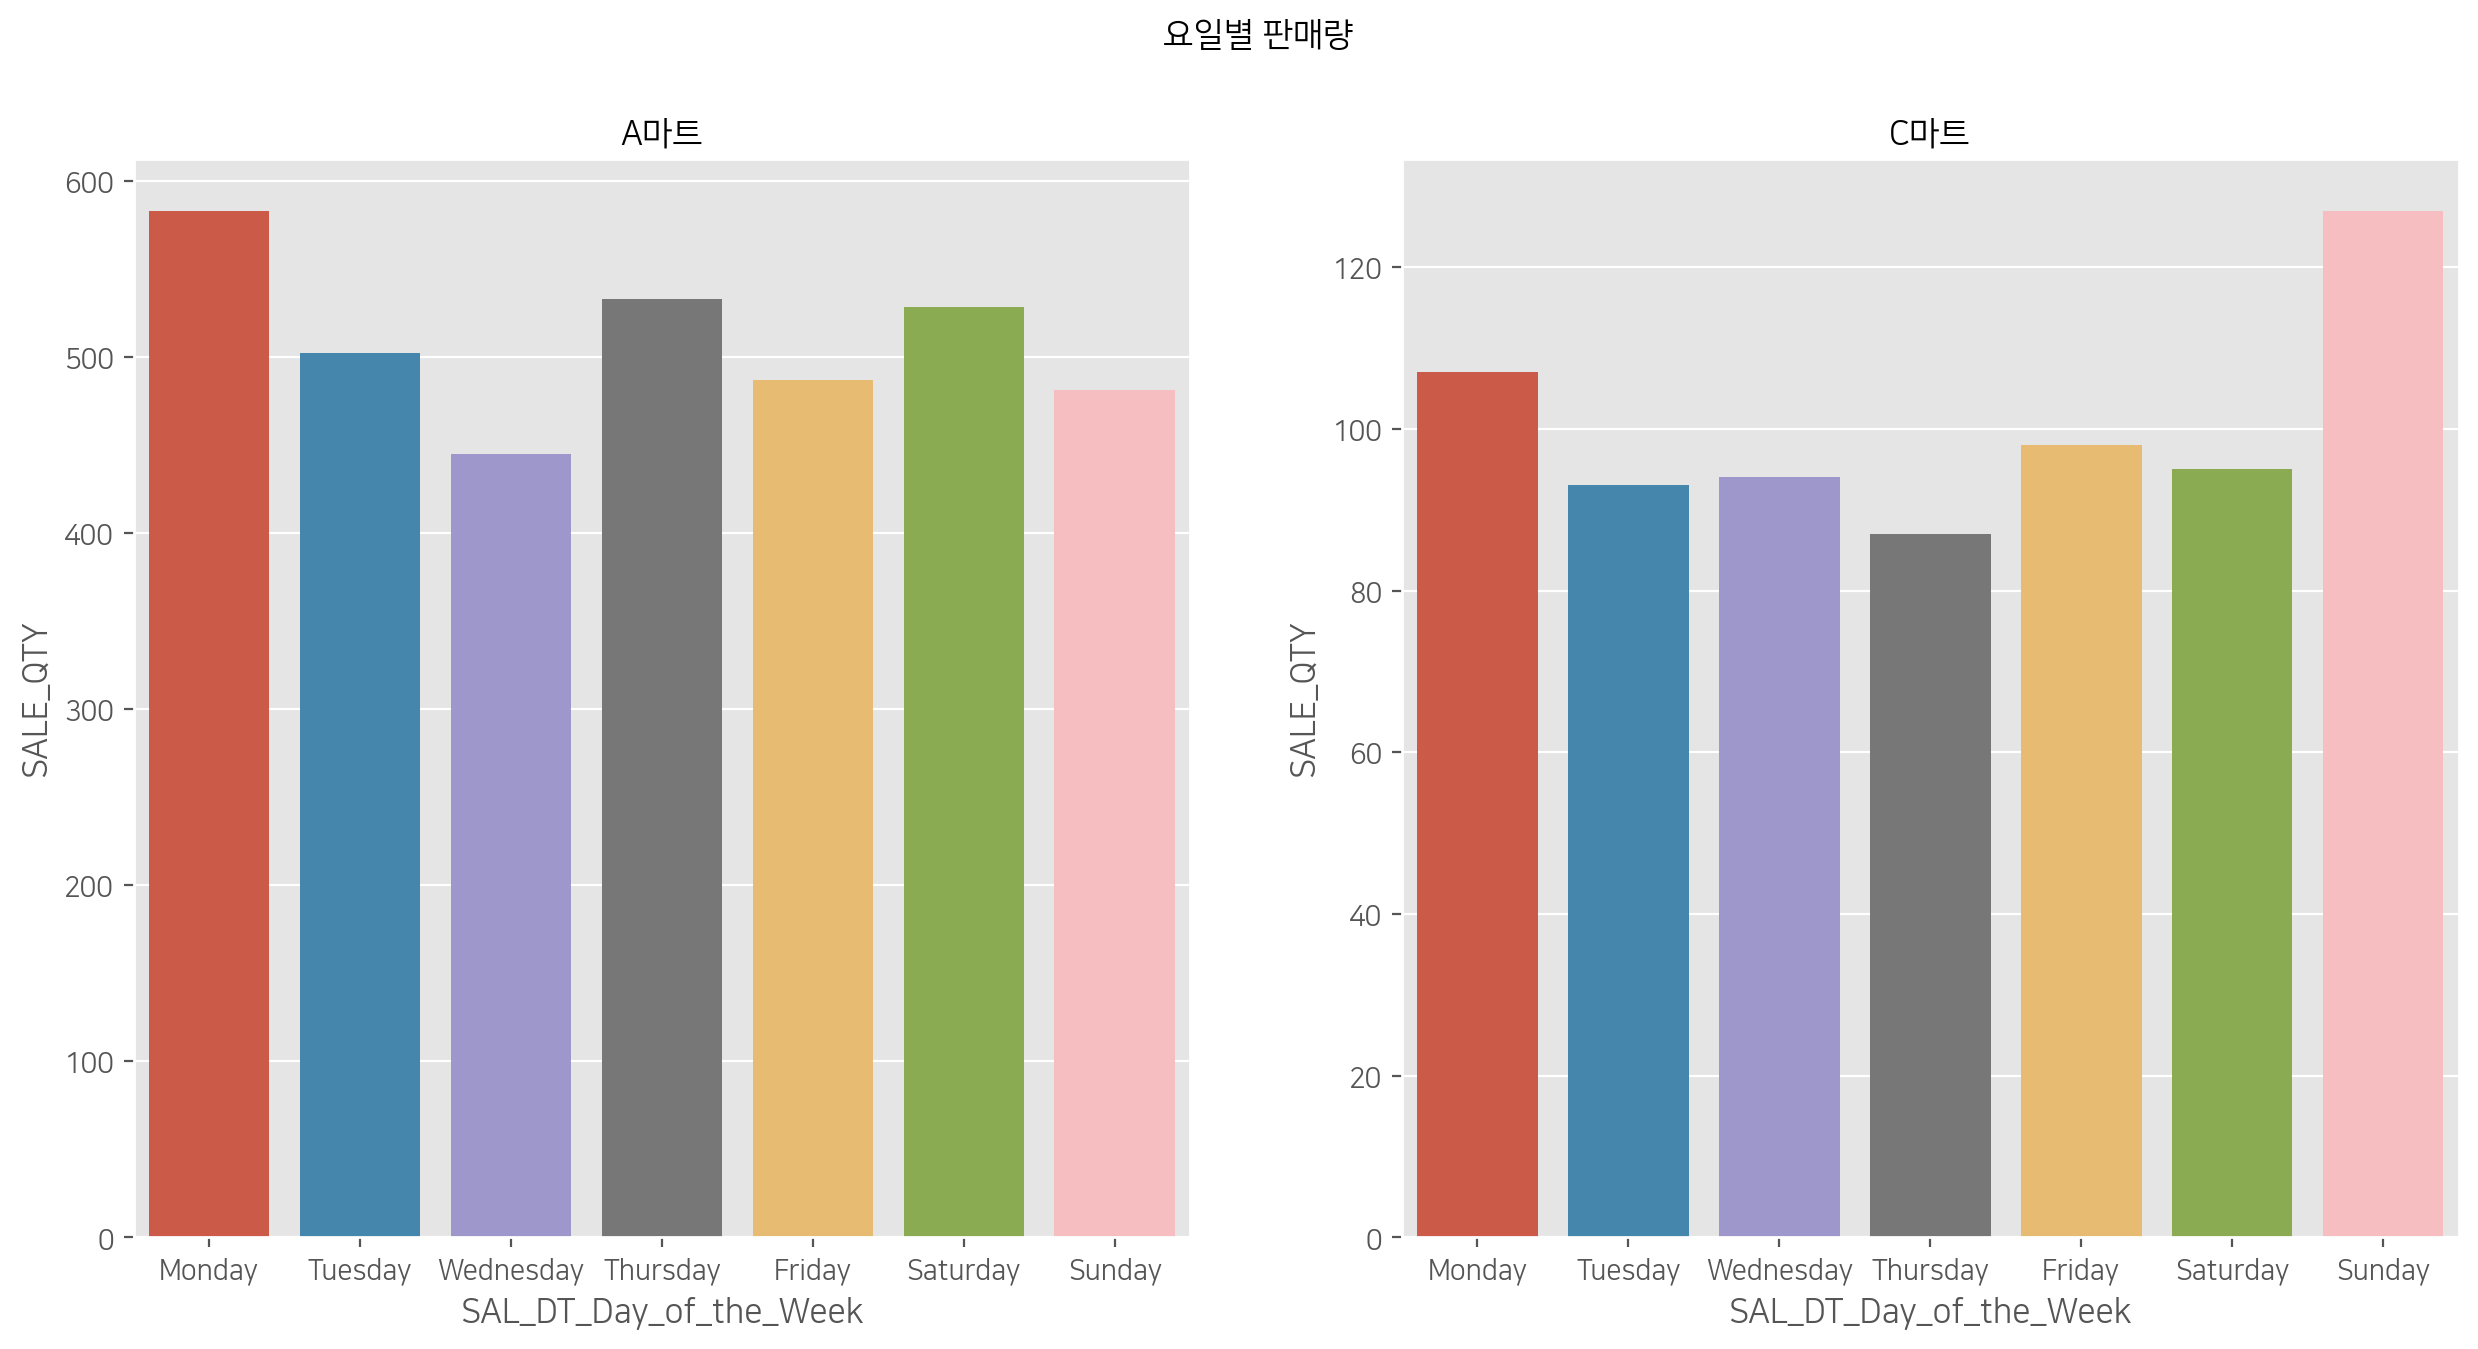

In [29]:
# Pivot Table
cnm_group_dw_a = pd.pivot_table(data=cnm_a, index='SAL_DT_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')
cnm_group_dw_c = pd.pivot_table(data=cnm_c, index='SAL_DT_Day_of_the_Week', values='SALE_QTY', aggfunc='sum')

# Graph
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
plt.suptitle('요일별 판매량', fontweight='bold', size = 12)

plt.subplot(121)
plt.title('A마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_dw_a.index, y=cnm_group_dw_a['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.subplot(122)
plt.title('C마트', fontweight='bold', size = 12)
sns.barplot(x=cnm_group_dw_c.index, y=cnm_group_dw_c['SALE_QTY'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.show()

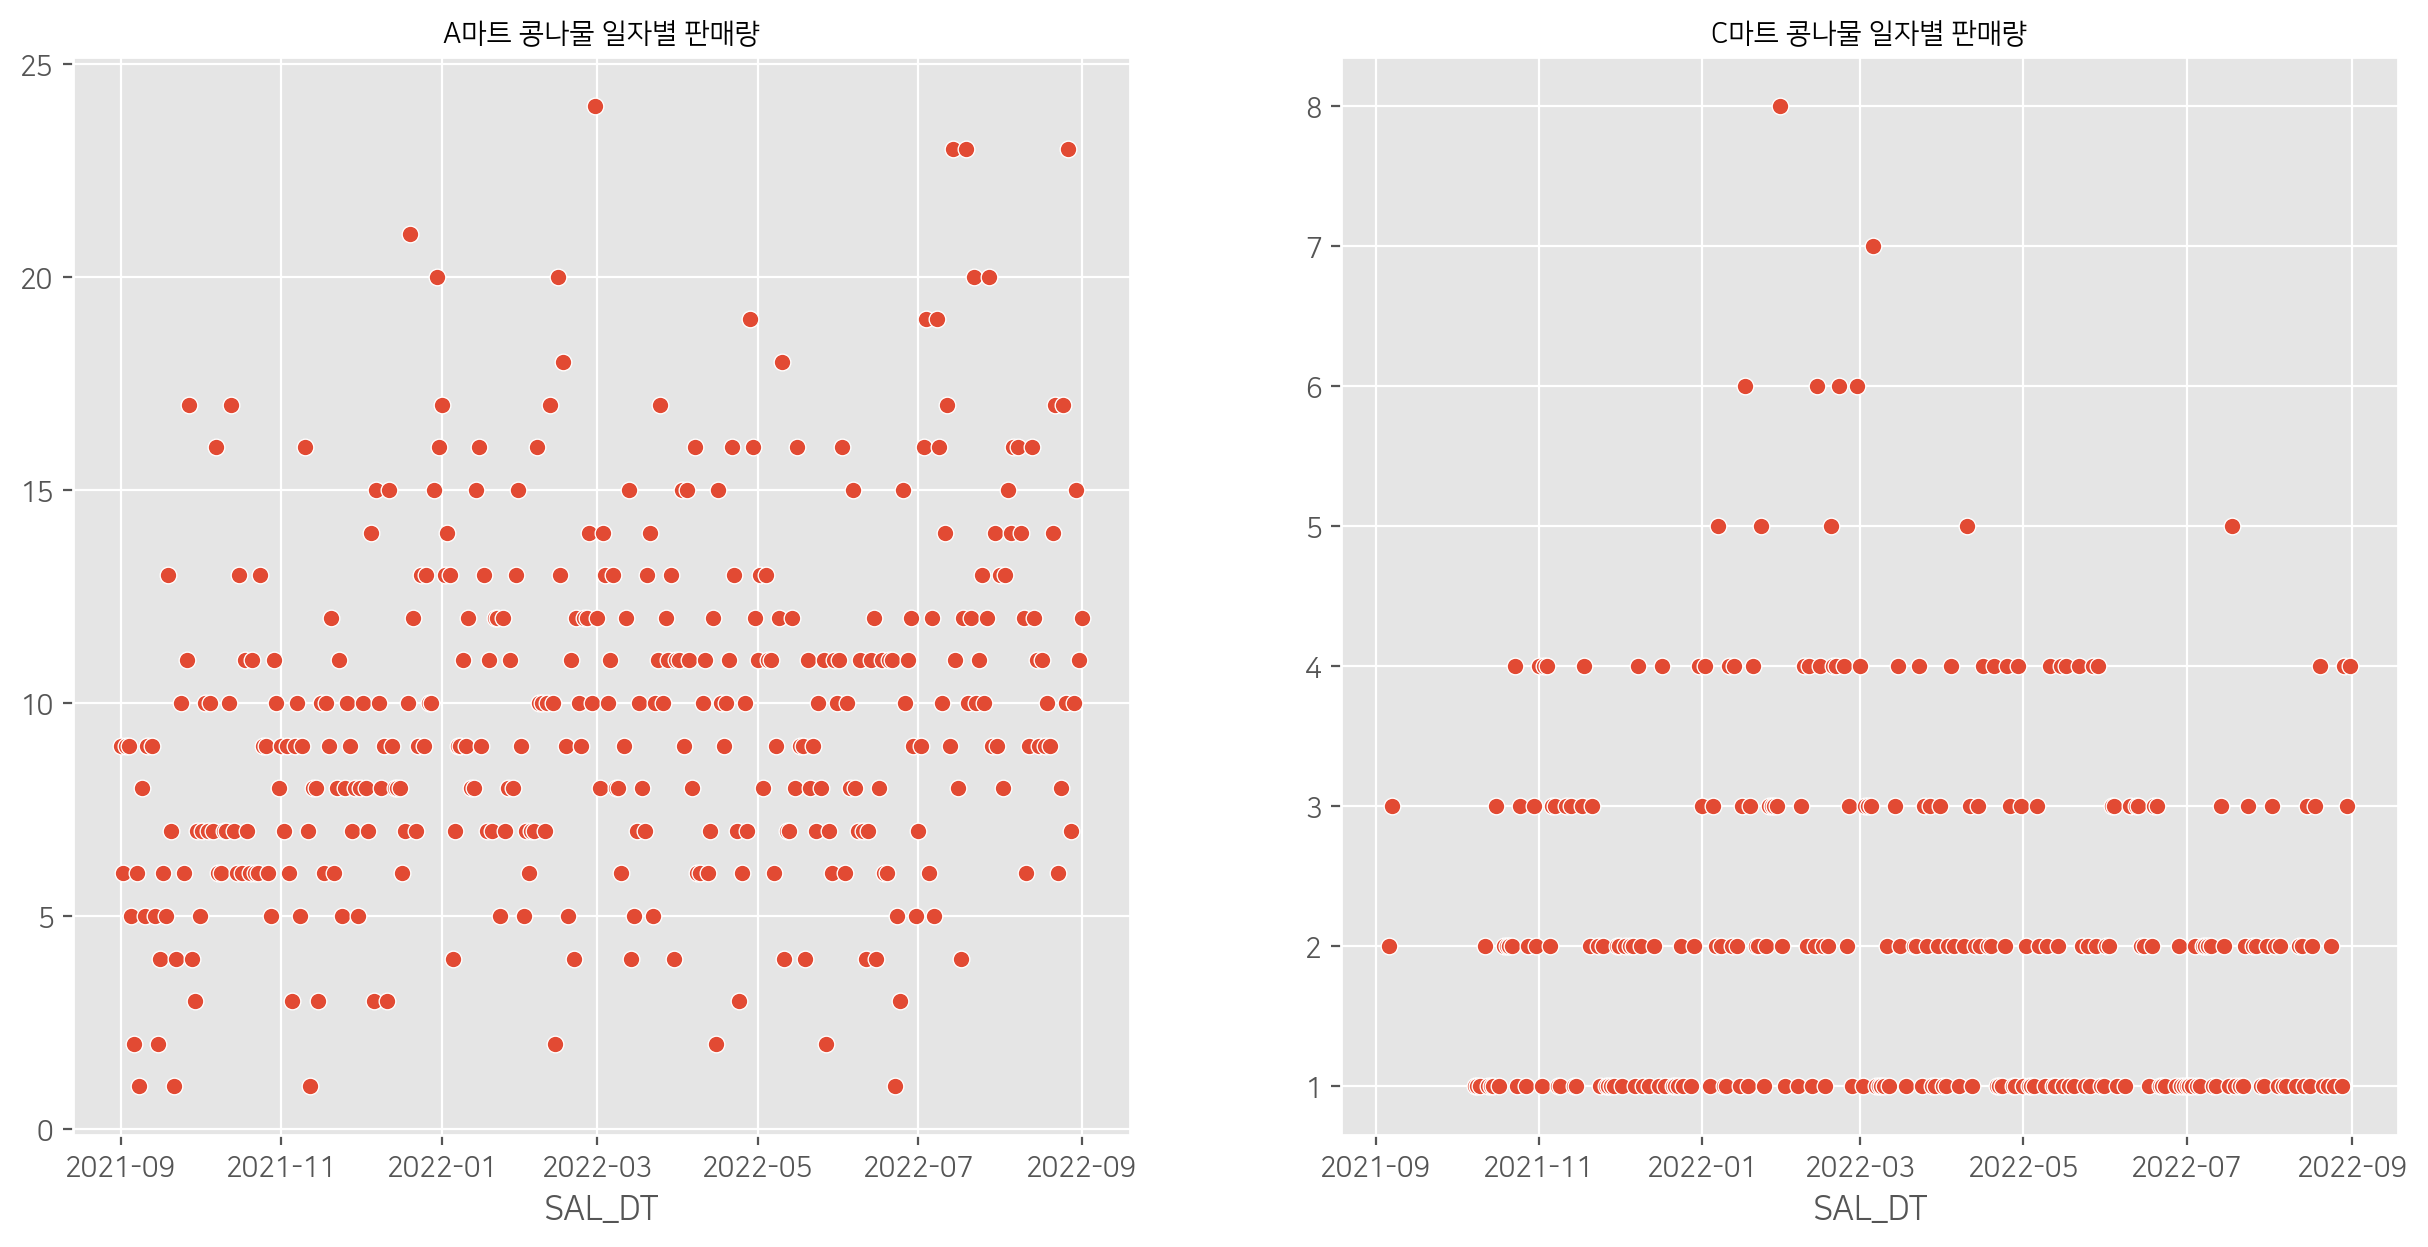

In [30]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

plt.subplot(121)
plt.title('A마트 콩나물 일자별 판매량', fontweight='bold', size = 10)
sns.scatterplot(x=a.index, y=a.values)

plt.subplot(122)
plt.title('C마트 콩나물 일자별 판매량', fontweight='bold', size = 10)
sns.scatterplot(x=c.index, y=c.values)

plt.show()

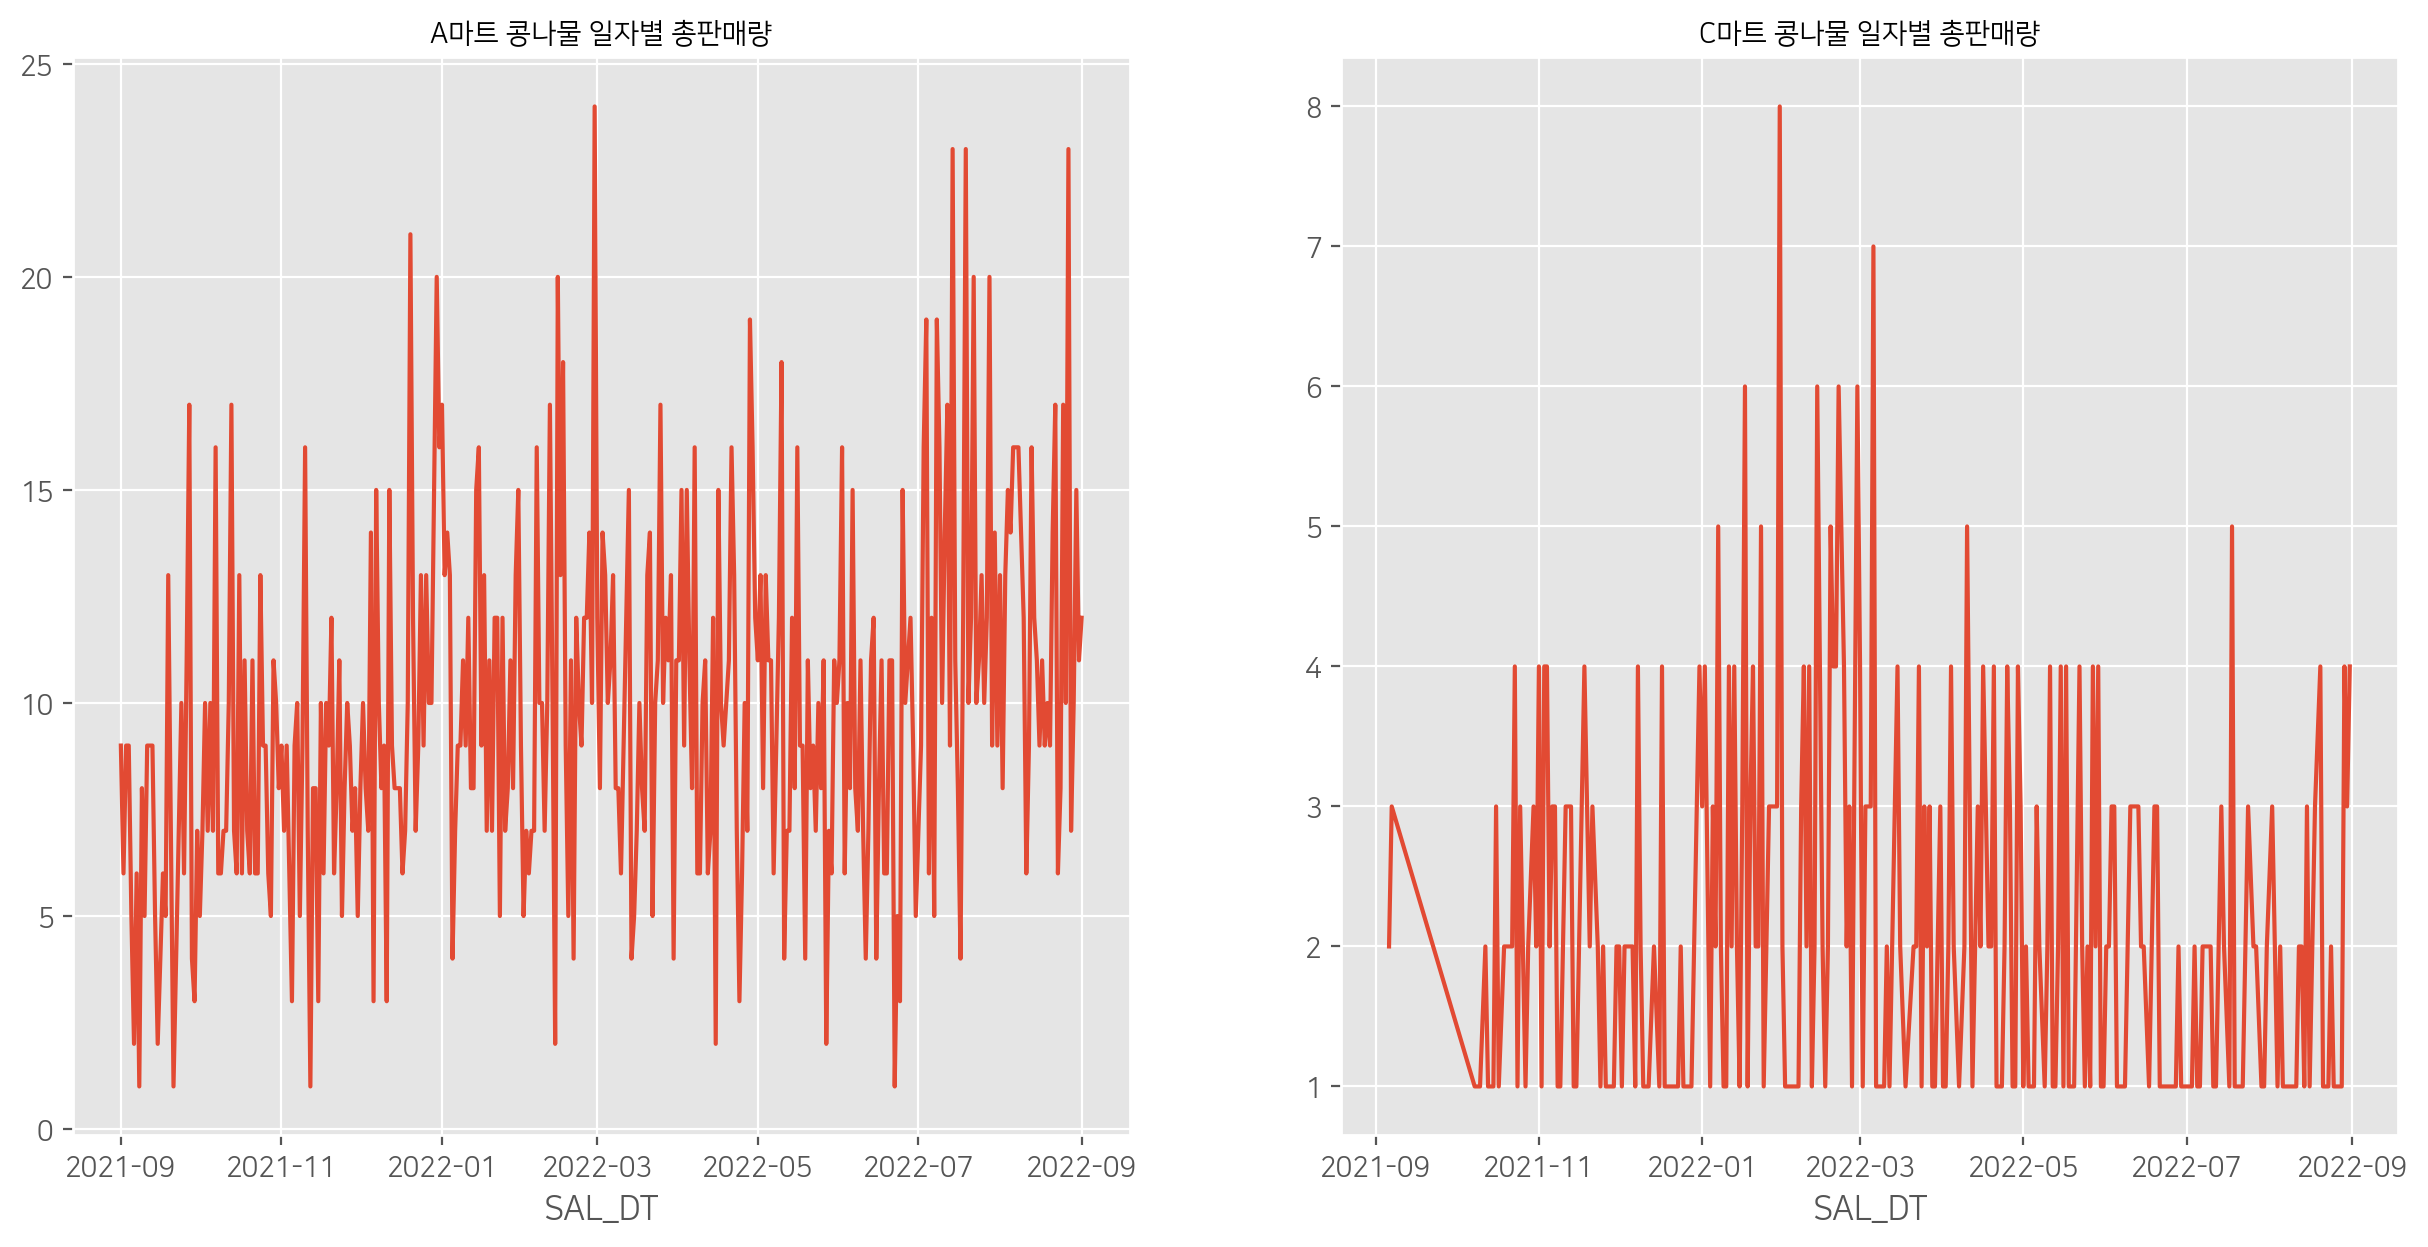

In [31]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

plt.subplot(121)
plt.title('A마트 콩나물 일자별 총판매량', fontweight='bold', size = 10)
sns.lineplot(x=a.index, y=a.values, estimator=sum) 

plt.subplot(122)
plt.title('C마트 콩나물 일자별 총판매량', fontweight='bold', size = 10)
sns.lineplot(x=c.index, y=c.values, estimator=sum)

plt.show()

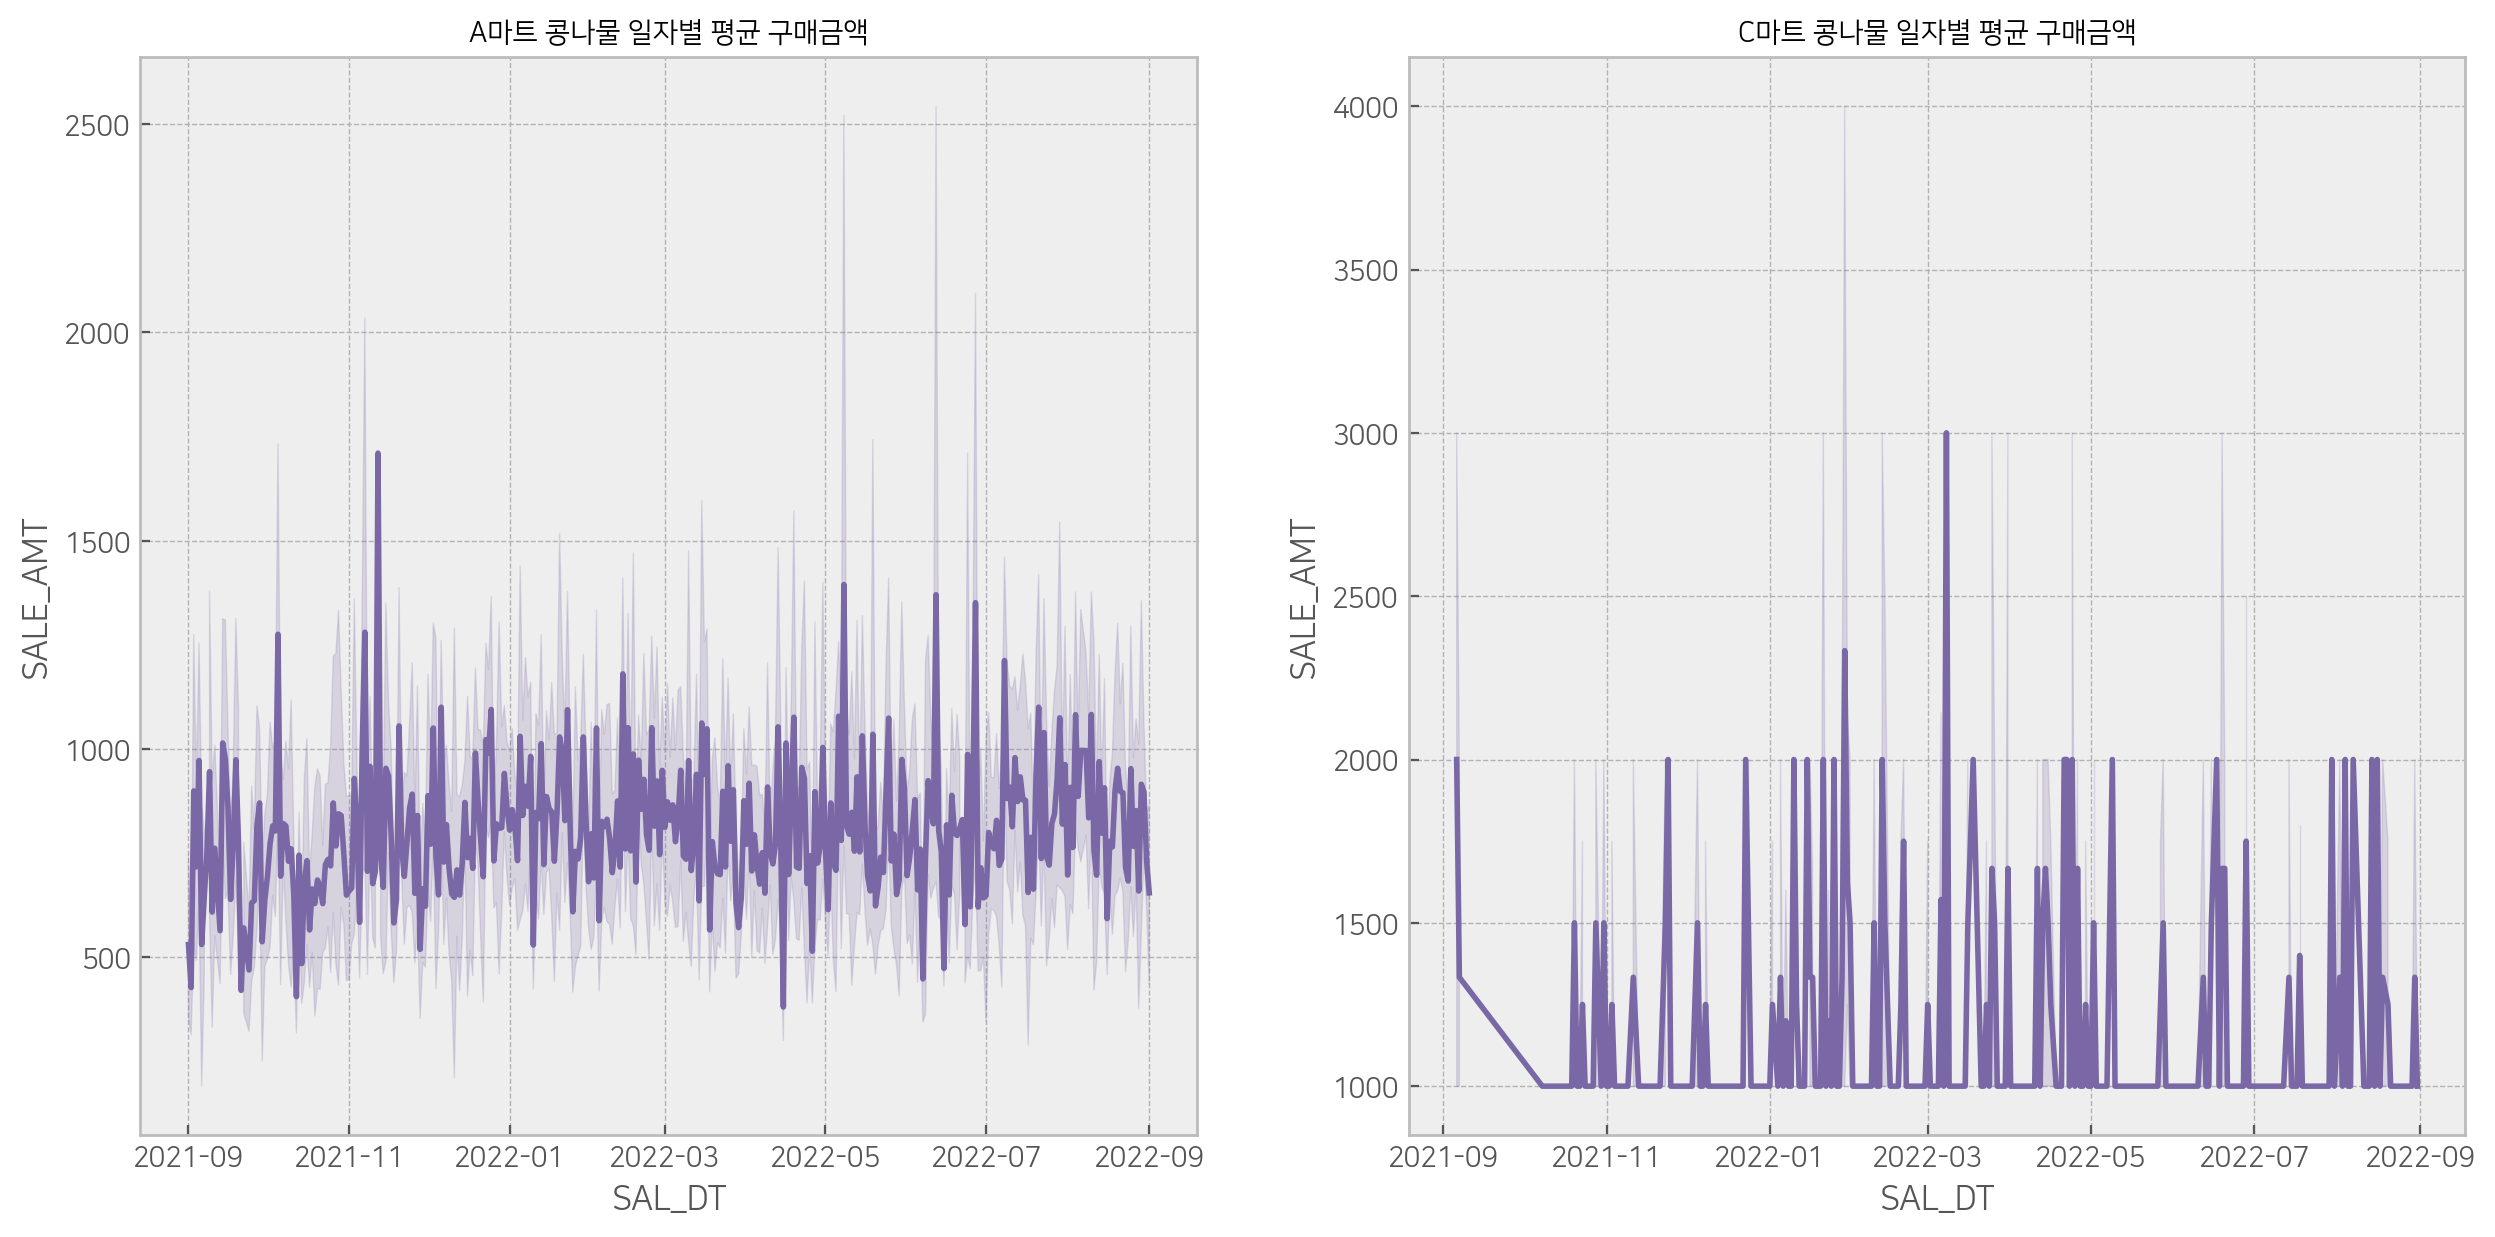

In [32]:
plt.figure(figsize=(15,7))
plt.style.use('bmh')

plt.subplot(121)
plt.title('A마트 콩나물 일자별 평균 구매금액', fontweight='bold', size = 10)
sns.lineplot(data=cnm_a, x='SAL_DT', y='SALE_AMT', color='C2') # 일자별 구매금액의 평균이 계산됨

plt.subplot(122)
plt.title('C마트 콩나물 일자별 평균 구매금액', fontweight='bold', size = 10)
sns.lineplot(data=cnm_c, x='SAL_DT', y='SALE_AMT', color='C2') # 일자별 구매금액의 평균이 계산됨

plt.show()

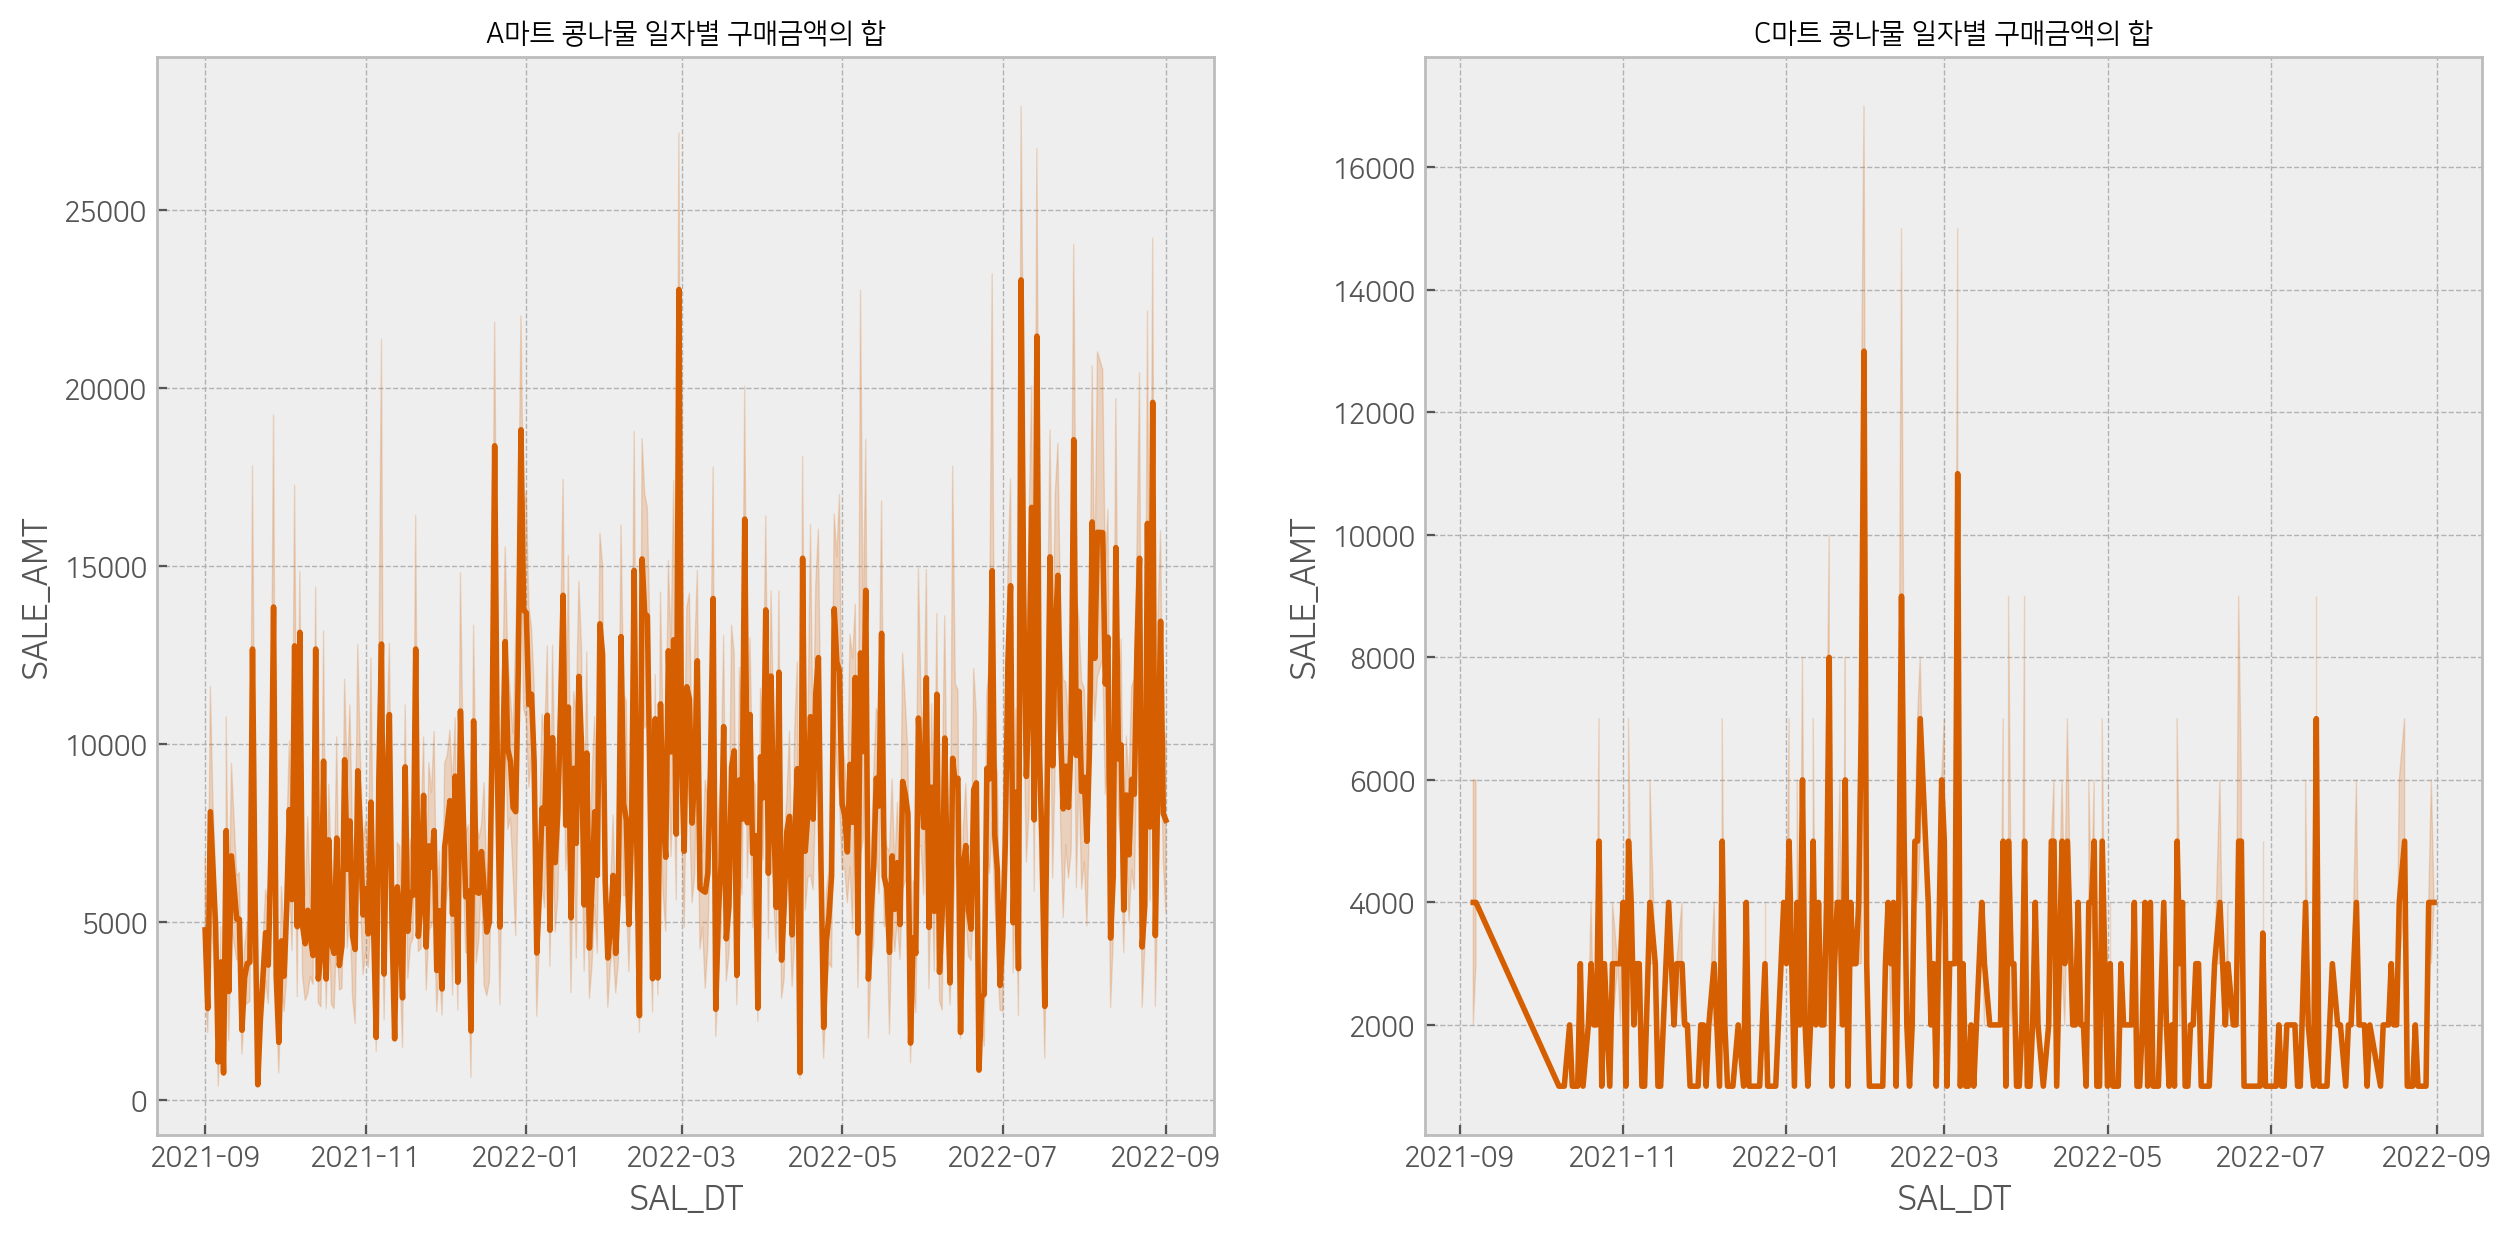

In [33]:
plt.figure(figsize=(15,7))
plt.style.use('bmh')

plt.subplot(121)
plt.title('A마트 콩나물 일자별 구매금액의 합', fontweight='bold', size = 10)
sns.lineplot(data=cnm_a, x='SAL_DT', y='SALE_AMT', estimator=sum, color='C4') # 일자별 구매금액의 합이 계산됨

plt.subplot(122)
plt.title('C마트 콩나물 일자별 구매금액의 합', fontweight='bold', size = 10)
sns.lineplot(data=cnm_c, x='SAL_DT', y='SALE_AMT', estimator=sum, color='C4') # 일자별 구매금액의 합이 계산됨

plt.show()

In [34]:
# 매장 목록: str_list
str_list = pd.read_csv('data/str_list.csv')

str_list.loc[[0,2]][['STR_NM','CM_ITM_NM','POS_QTY']].set_index('STR_NM')

,CM_ITM_NM,POS_QTY
STR_NM,,
A마트,100평대,9
C마트,30평대,1


- 공산품(ex. CJ 브랜드)이 아니면서 계절성을 타지 않고 정기적으로 소비하는 신선상품(콩나물)을 판매하는 마트(A마트, C마트) 두 곳을 선정
    - 월별, 주(Week)차별, 요일별 거래건수, 일별 판매량과 일별 평균 구매금액을 비교
        - 월별 거래건수: 9월이 공통적으로 최저 거래건수 월로 기록
        - 주(Week)차별 거래건수: 4주차 기준은 특이한 패턴을 보이지 않음, 5주차 기준은 A마트와 C마트가 유사한 패턴을 보임 (But, 5의 순위가 다름)
        - 요일별 거래건수: 월요일이 공통적으로 요일별 거래건수 높은 순위를 보임
        - 일별 판매량: 리테일에서 제공한 2021년 9월부터 2022년 9월 전체기간을 조망하면 A마트는 점진적으로 판매가 증가하는 추세이나, C마트의 경우는 균일한 패턴을 보임
        - 구매금액(평균, 합) 경우에도 이질적인 패턴을 보임
- EDA 결과, 이질적인 추세를 보이기 때문에, 마트 위치, 규모(A마트: 100평대, 포스기 9대 → 대형 매장, C마트: 30평대,포스기 1대 → 소형 매장)에 따른 **공간에 따른 소비계층의 이질성이 있는지**에 대한 가설 설정이 필요함